In [1]:
import numpy as np
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [3]:
print('mnist.data.shape:',mnist.data.shape)

mnist.data.shape: (70000, 784)


In [4]:
X, y = mnist["data"], mnist["target"]
print('X.shape:', X.shape, " y.shape:", y.shape)

X.shape: (70000, 784)  y.shape: (70000,)


In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 给训练集洗牌
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [6]:
# 标准化
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', 
                               metric_params=None, n_jobs=None, n_neighbors=4, p=2, weights='distance')
knn_clf.fit(X_train, y_train)  # knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [7]:
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)                      # 应该在predict之前
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5884,    5,    2,    0,    1,    6,   17,    2,    2,    4],
       [   1, 6709,   10,    1,    2,    1,    2,   11,    2,    3],
       [  32,   51, 5744,   15,    8,    6,    8,   76,   10,    8],
       [   2,   16,   33, 5906,    0,   63,    4,   31,   49,   27],
       [   3,   45,    1,    1, 5649,    0,   14,   10,    3,  116],
       [  13,    6,    2,   52,    2, 5230,   64,    8,   14,   30],
       [  21,   11,    1,    0,    6,   19, 5857,    0,    3,    0],
       [   2,   57,   13,    3,   12,    2,    0, 6110,    3,   63],
       [  15,   67,   18,   68,   22,   85,   25,   15, 5468,   68],
       [  19,    8,    3,   33,   52,   11,    4,   61,    6, 5752]],
      dtype=int64)

In [8]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

In [9]:
import os
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Saving figure confusion_matrix_plot


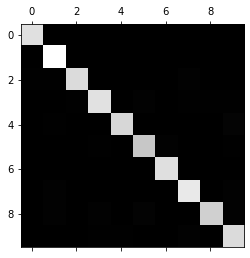

In [11]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Saving figure confusion_matrix_errors_plot


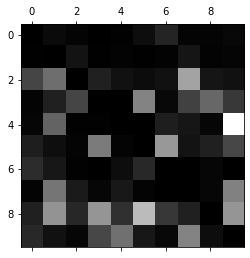

In [12]:
# 比较错误率（将混淆矩阵中的每个值除以相应类别中的图片数量）
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# 用0填充对角线，只保留错误，重新绘制结果
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()